In [16]:
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from src.utils.config import load_config

class Sim:
    def __init__(self,config,df=None):
        self.config = config
        self.df = df
        
    def get_data(self):
        """Loads in stock data from yfinance, but with SP500. I use 'sim_assets from config.yaml to make this easier"""
        tickers = self.config['sim_tickers']
        self.df = yf.download(tickers,start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.df = self.df.dropna()
        return self.df
    
    
    def single_index_model(self,output_dir="images/sim"):
        """Converts sp500 and stock classes to frame for CAPM single index model"""
        if self.df is None:
            self.get_data()
        
        #stock and sp500 tickers for frame
        stock_tickers = self.config['stock_tickers']
        sp500_ticker = self.config['sp500_ticker']
        risk_free_rate = self.config['risk_free_rate']
        
        # to turn the data into seperate frame for market returns and stock returns
        stock_data = self.df[stock_tickers]
        sp500_data = self.df[sp500_ticker]
        
        
        Market_Excess_Returns = sp500_data - self.config['risk_free_rate']
        for stock_ticker in stock_tickers:
            stock_data = self.df[stock_ticker]
            Excess_Returns = stock_data - risk_free_rate
            model = sm.OLS(endog=stock_data,exog=sm.add_constant(Market_Excess_Returns)).fit()
            print(f'Single Index Model for: {stock_ticker}')
            print(f'Excess Returns for Historical Stock Data: {Excess_Returns}')
            print(f'Market Excess Return: {Market_Excess_Returns}')
            print(model.summary())
            
        
            plt.figure(figsize=(10,6))
            sns.scatterplot(x=Market_Excess_Returns, y=Excess_Returns, label=stock_ticker)
            sns.lineplot(x=Market_Excess_Returns, y=model.fittedvalues, color='red', label='Security Market Line')
            plt.title(f'Single Index Model for {stock_ticker}')
            plt.xlabel('Market Excess Return')
            plt.ylabel(f'{stock_ticker} Excess Return')
            plt.legend()
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, f"single_index_model_{stock_ticker}.png"))
            plt.show()
            plt.close()





C:\Users\katsa\AppData\Local\Temp\ipykernel_14916\1804514260.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(tickers,start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  12 of 12 completed


Single Index Model for: AAPL
Excess Returns for Historical Stock Data: Date
2020-10-12    121.143333
2020-10-13    117.929717
2020-10-14    118.017348
2020-10-15    117.549903
2020-10-16    115.904174
                 ...    
2025-07-10    212.409904
2025-07-11    211.159904
2025-07-14    208.619895
2025-07-15    209.109901
2025-07-16    210.159904
Name: AAPL, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:         

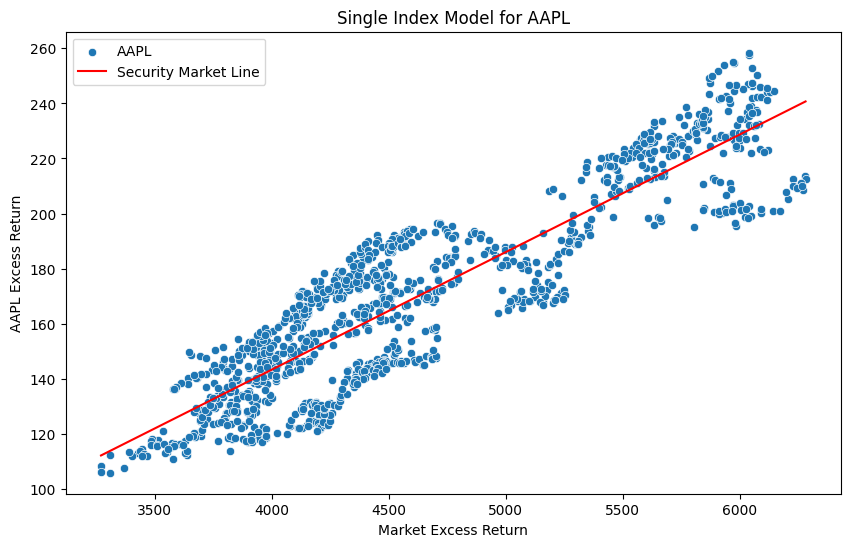

Single Index Model for: NVDA
Excess Returns for Historical Stock Data: Date
2020-10-12     14.183405
2020-10-13     14.205592
2020-10-14     14.053048
2020-10-15     13.928172
2020-10-16     13.770145
                 ...    
2025-07-10    164.099906
2025-07-11    164.919898
2025-07-14    164.069907
2025-07-15    170.699897
2025-07-16    171.369895
Name: NVDA, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:         

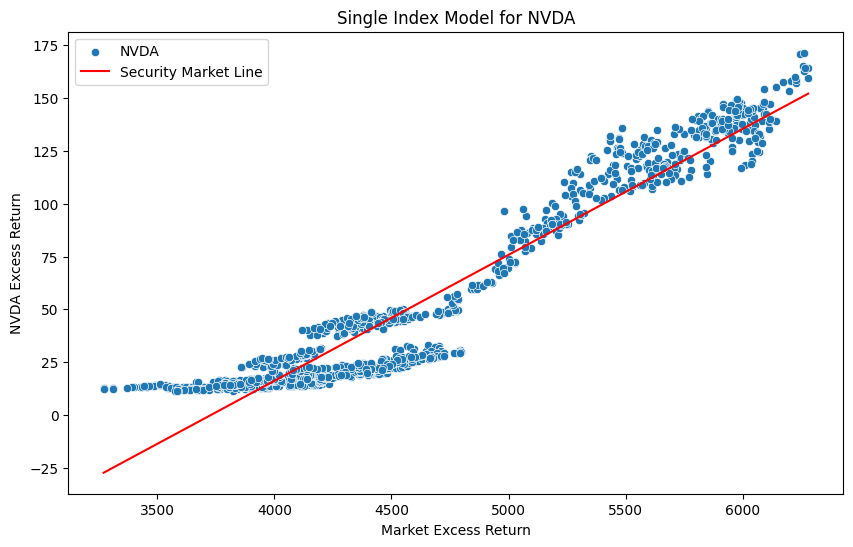

Single Index Model for: MSFT
Excess Returns for Historical Stock Data: Date
2020-10-12    212.632789
2020-10-13    214.035010
2020-10-14    212.114204
2020-10-15    210.961738
2020-10-16    210.961738
                 ...    
2025-07-10    501.479911
2025-07-11    503.319907
2025-07-14    503.019889
2025-07-15    505.819907
2025-07-16    505.619895
Name: MSFT, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:         

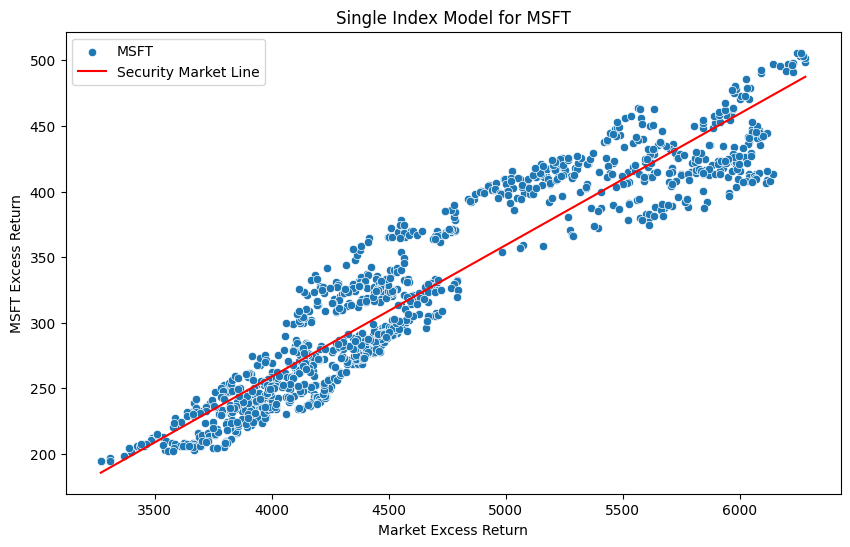

Single Index Model for: GOOGL
Excess Returns for Historical Stock Data: Date
2020-10-12     77.763030
2020-10-13     77.886283
2020-10-14     77.705871
2020-10-15     77.309745
2020-10-16     77.917602
                 ...    
2025-07-10    177.619895
2025-07-11    180.189902
2025-07-14    181.559898
2025-07-15    181.999900
2025-07-16    182.969901
Name: GOOGL, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:       

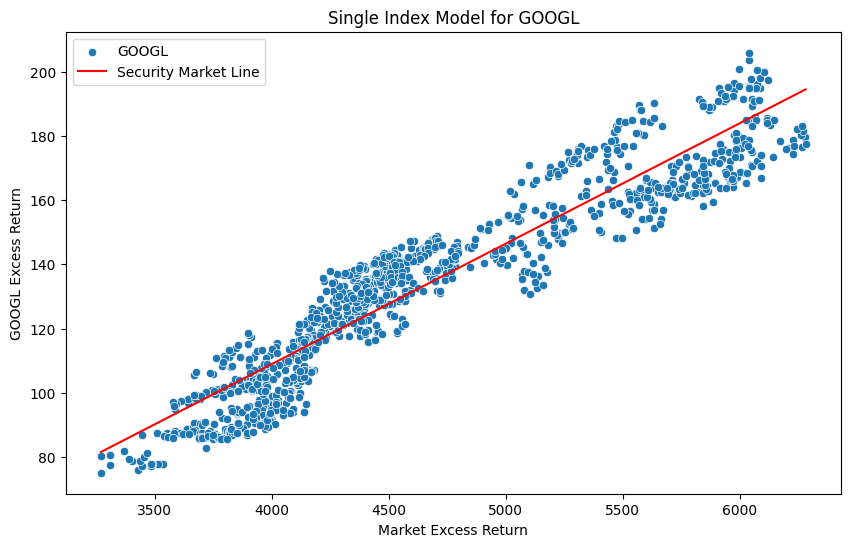

Single Index Model for: META
Excess Returns for Historical Stock Data: Date
2020-10-12    274.245383
2020-10-13    274.633292
2020-10-14    270.336814
2020-10-15    265.264609
2020-10-16    264.478965
                 ...    
2025-07-10    727.239890
2025-07-11    717.509910
2025-07-14    720.919883
2025-07-15    710.389915
2025-07-16    702.909873
Name: META, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:         

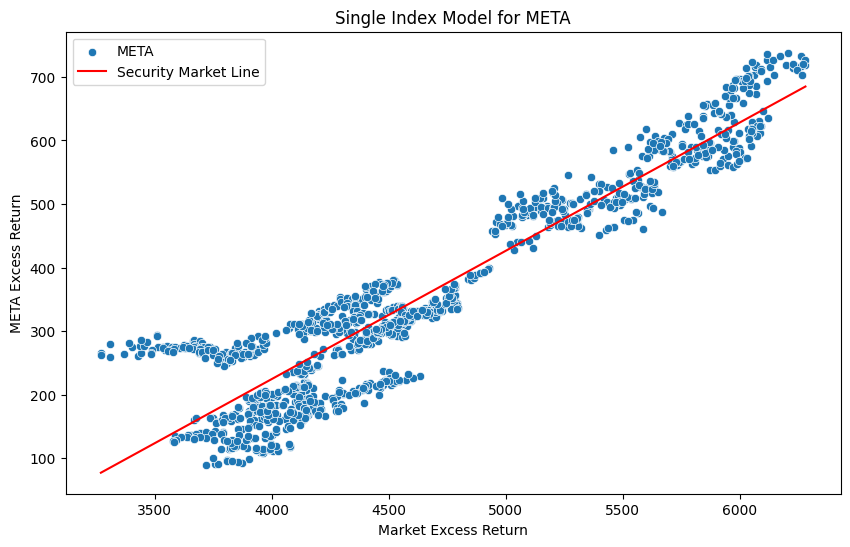

Single Index Model for: TSLA
Excess Returns for Historical Stock Data: Date
2020-10-12    147.433234
2020-10-13    148.883231
2020-10-14    153.766563
2020-10-15    149.626563
2020-10-16    146.556571
                 ...    
2025-07-10    309.869895
2025-07-11    313.509910
2025-07-14    316.899894
2025-07-15    310.779899
2025-07-16    321.669913
Name: TSLA, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:         

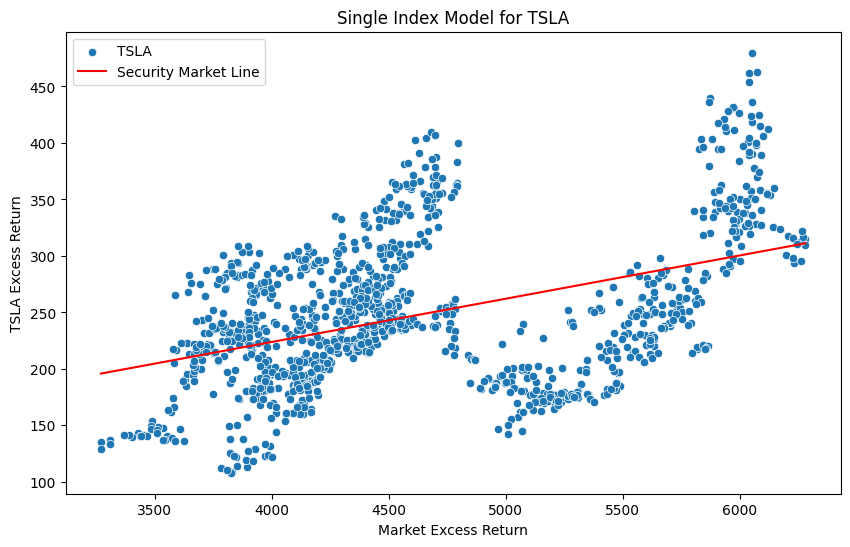

Single Index Model for: JPM
Excess Returns for Historical Stock Data: Date
2020-10-12     90.407699
2020-10-13     88.942672
2020-10-14     88.448447
2020-10-15     89.772269
2020-10-16     89.586921
                 ...    
2025-07-10    288.189902
2025-07-11    286.859885
2025-07-14    288.699912
2025-07-15    286.549888
2025-07-16    285.819907
Name: JPM, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:           

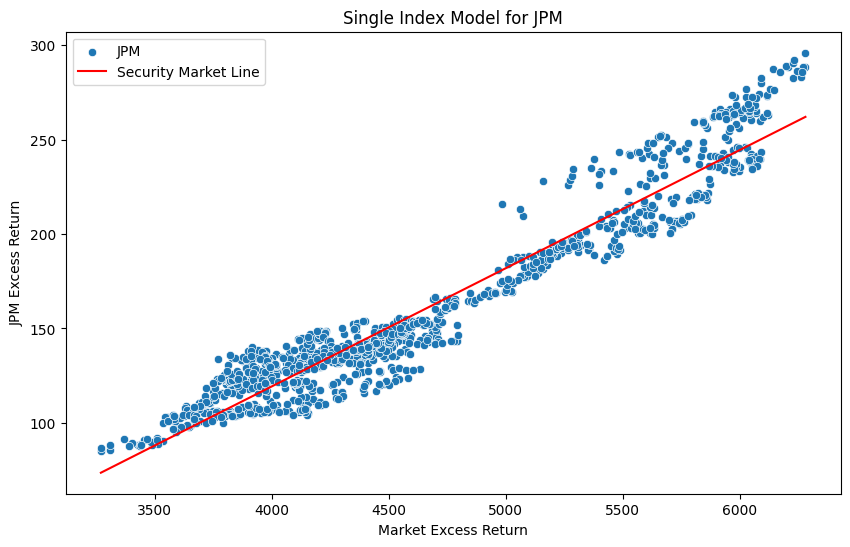

Single Index Model for: AVGO
Excess Returns for Historical Stock Data: Date
2020-10-12     34.236747
2020-10-13     34.152599
2020-10-14     34.046062
2020-10-15     34.012942
2020-10-16     33.898357
                 ...    
2025-07-10    275.399894
2025-07-11    274.379905
2025-07-14    275.599906
2025-07-15    280.939902
2025-07-16    280.809898
Name: AVGO, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   AVGO   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:         

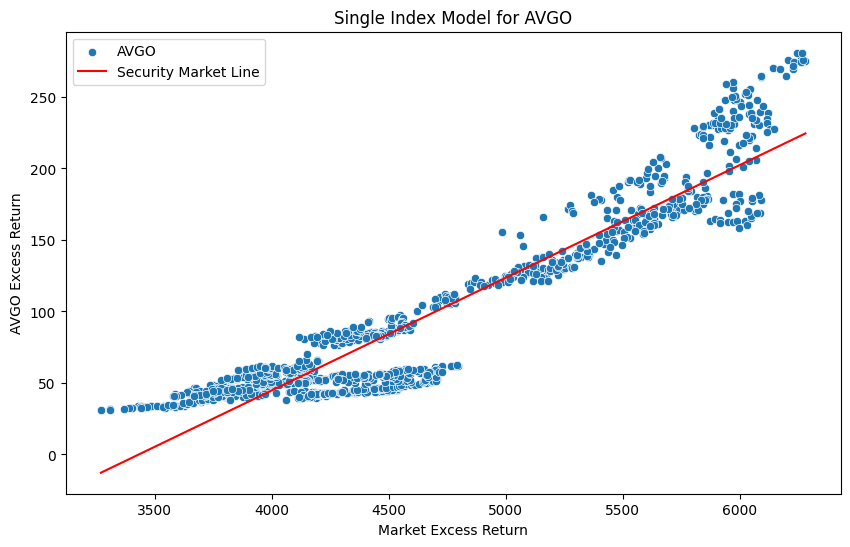

Single Index Model for: WMT
Excess Returns for Historical Stock Data: Date
2020-10-12    44.956721
2020-10-13    45.573814
2020-10-14    44.860118
2020-10-15    45.043990
2020-10-16    45.100093
                ...    
2025-07-10    94.859901
2025-07-11    94.399902
2025-07-14    95.779899
2025-07-15    95.389899
2025-07-16    95.149902
Name: WMT, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least

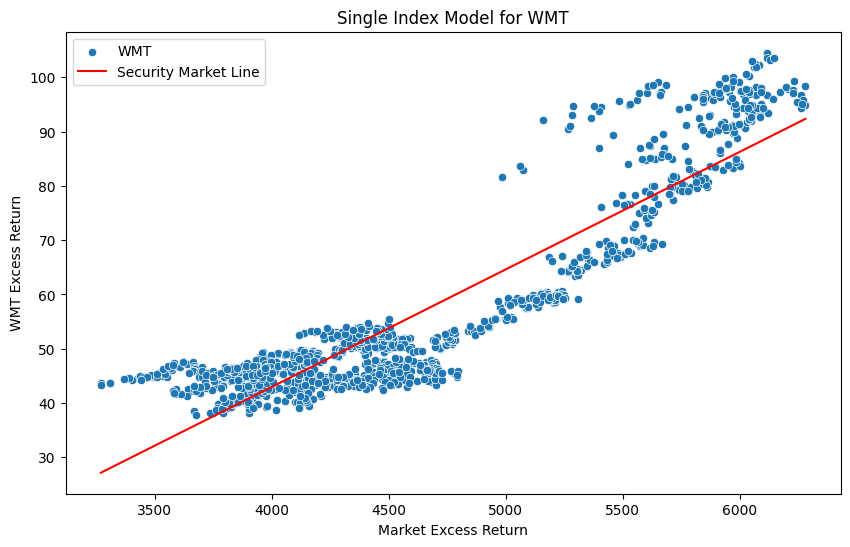

Single Index Model for: V
Excess Returns for Historical Stock Data: Date
2020-10-12    199.494147
2020-10-13    197.483802
2020-10-14    195.434684
2020-10-15    192.873374
2020-10-16    193.559608
                 ...    
2025-07-10    355.879905
2025-07-11    347.929893
2025-07-14    350.499900
2025-07-15    347.019889
2025-07-16    349.899894
Name: V, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:               

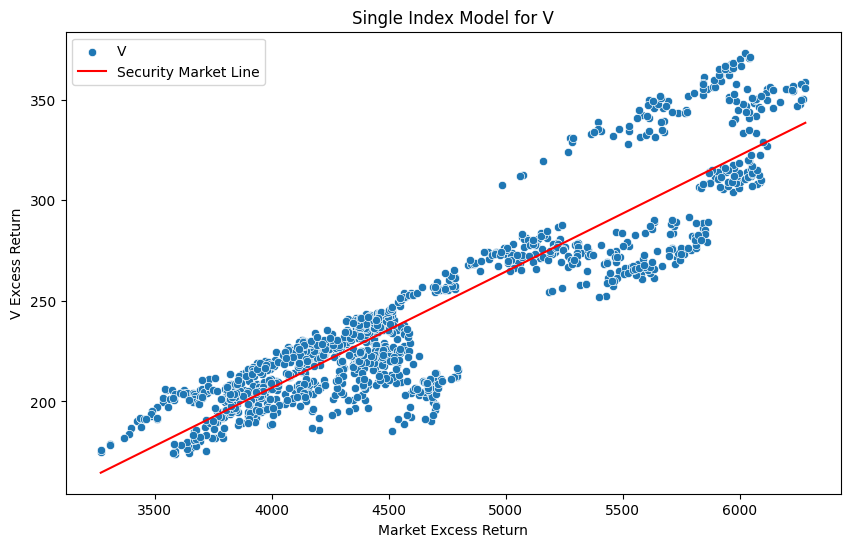

Single Index Model for: NFLX
Excess Returns for Historical Stock Data: Date
2020-10-12     539.809898
2020-10-13     554.089927
2020-10-14     541.449912
2020-10-15     541.939902
2020-10-16     530.789878
                 ...     
2025-07-10    1250.589866
2025-07-11    1245.109885
2025-07-14    1261.949851
2025-07-15    1260.269920
2025-07-16    1250.309959
Name: NFLX, Length: 1195, dtype: float64
Market Excess Return: Date
2020-10-12    3534.219871
2020-10-13    3511.929832
2020-10-14    3488.669822
2020-10-15    3483.339988
2020-10-16    3483.809959
                 ...     
2025-07-10    6280.459861
2025-07-11    6259.749900
2025-07-14    6268.559959
2025-07-15    6243.759666
2025-07-16    6263.700095
Name: ^GSPC, Length: 1195, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Metho

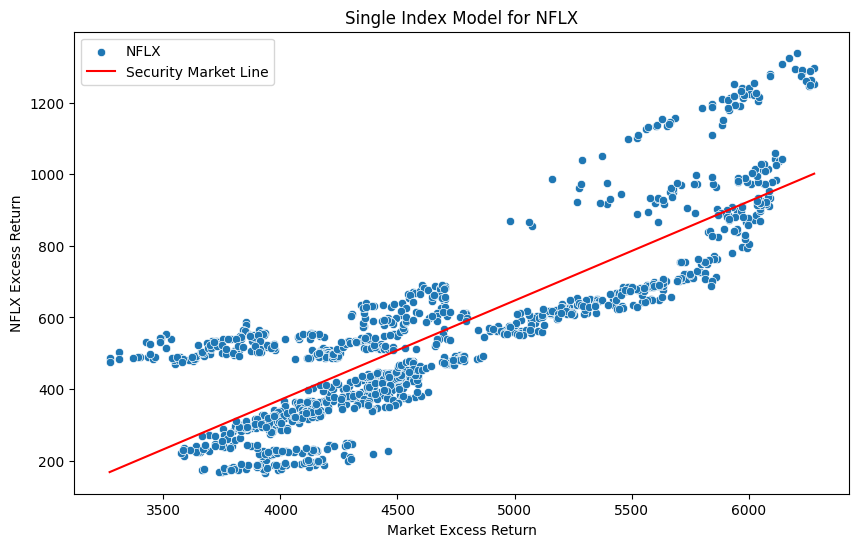

In [17]:
if __name__ == "__main__":
    config = load_config()
    sig_obj = Sim(config)
    sig_obj.get_data()
    sig_obj.single_index_model()